In [9]:
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.geometry_utils import transform_matrix
import json
import numpy as np
from collections import Counter, defaultdict
import pandas as pd

Load the Nuscenes Data

In [2]:
nusc_trainval = NuScenes(version='v1.0-trainval', dataroot='../data/v1.0-trainval_meta', verbose=True)

Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 35.201 seconds.
Reverse indexing ...
Done reverse indexing in 11.9 seconds.


Analyzing how many objects with the coupled visibility are in the dataset:

In [5]:
# Liste zur Speicherung der Visibility-Levels aller Annotationen
visibility_counts = Counter()

for ann in nusc_trainval.sample_annotation:
    visibility = ann['visibility_token']
    visibility_counts[visibility] += 1

Vizualization:

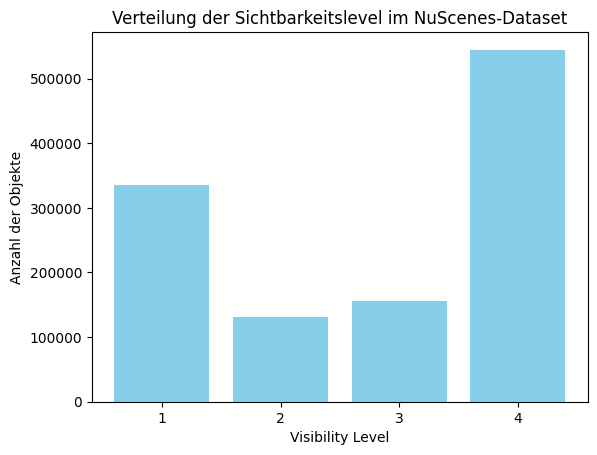

In [7]:
import matplotlib.pyplot as plt

# Sortierte Sichtbarkeitslevel und deren Häufigkeit extrahieren
labels, values = zip(*sorted(visibility_counts.items()))

# Balkendiagramm erstellen
plt.bar(labels, values, color='skyblue')
plt.xlabel("Visibility Level")
plt.ylabel("Anzahl der Objekte")
plt.title("Verteilung der Sichtbarkeitslevel im NuScenes-Dataset")
plt.show()

Aufgeteilt auf die verschiedenen Klassen:

In [11]:
# Klassen von Interesse definieren
classes_of_interest = ["vehicle.car", "vehicle.truck", "human.pedestrian.adult"]

# Dictionary für Visibility-Level nach Klassen
class_visibility_counts = defaultdict(Counter)

# Durch alle Annotationen gehen
for ann in nusc_trainval.sample_annotation:
    instance = nusc_trainval.get("instance", ann["instance_token"])
    category = nusc_trainval.get("category", instance["category_token"])["name"]

    visibility = ann["visibility_token"]
    
    # Nur relevante Klassen betrachten
    if category in classes_of_interest:
        class_visibility_counts[category][visibility] += 1

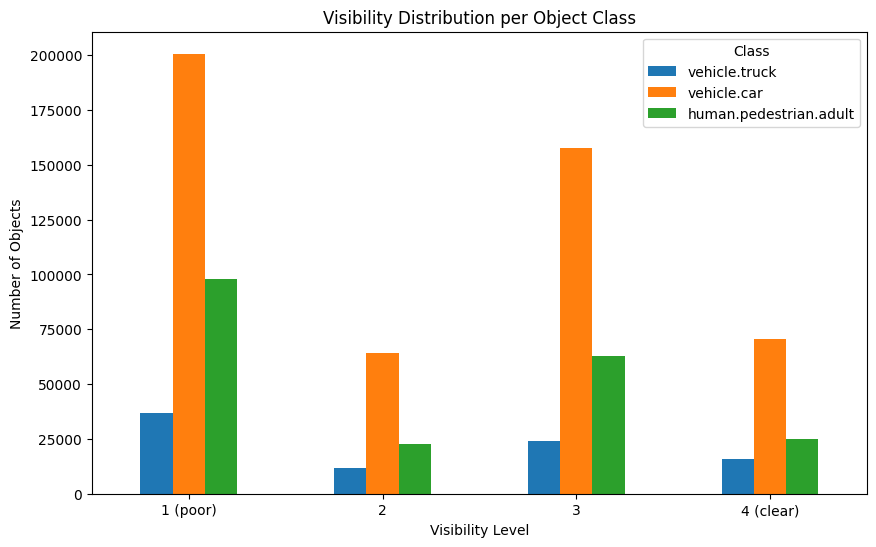

                             4      2       1      3
vehicle.truck            36641  11885   24015  15978
vehicle.car             200709  64195  157925  70493
human.pedestrian.adult   97871  22568   62709  25092


In [15]:
# Mapping der Visibility-Strings auf numerische Levels
visibility_mapping = {
    "v0-40": 1,
    "v40-60": 2,
    "v60-80": 3,
    "v80-100": 4
}

# Dictionary für Sichtbarkeitslevel nach Klassen
class_visibility_counts = defaultdict(Counter)

# Durch alle Annotationen gehen
for ann in nusc_trainval.sample_annotation:
    # Die Kategorie des Objekts holen
    instance = nusc_trainval.get("instance", ann["instance_token"])
    category = nusc_trainval.get("category", instance["category_token"])["name"]
    
    # Sichtbarkeits-Token abrufen
    visibility_token = ann["visibility_token"]

    # Sicherstellen, dass das Token existiert
    visibility_entry = nusc_trainval.get("visibility", visibility_token)

    # Level abrufen (statt "name" wird direkt der gespeicherte Level-String verwendet)
    visibility_level = visibility_mapping.get(visibility_entry["level"], 0)

    # Nur relevante Klassen betrachten
    if category in ["vehicle.car", "vehicle.truck", "human.pedestrian.adult"]:
        class_visibility_counts[category][visibility_level] += 1

# DataFrame erstellen
df_visibility = pd.DataFrame.from_dict(class_visibility_counts, orient="index").fillna(0)

# Balkendiagramm plotten
df_visibility.T.plot(kind="bar", figsize=(10, 6))
plt.xlabel("Visibility Level")
plt.ylabel("Number of Objects")
plt.title("Visibility Distribution per Object Class")
plt.xticks([0, 1, 2, 3], labels=["1 (poor)", "2", "3", "4 (clear)"], rotation=0)
plt.legend(title="Class")
plt.show()

# Tabelle anzeigen
print(df_visibility)


### __Only Cars for the analysis:__

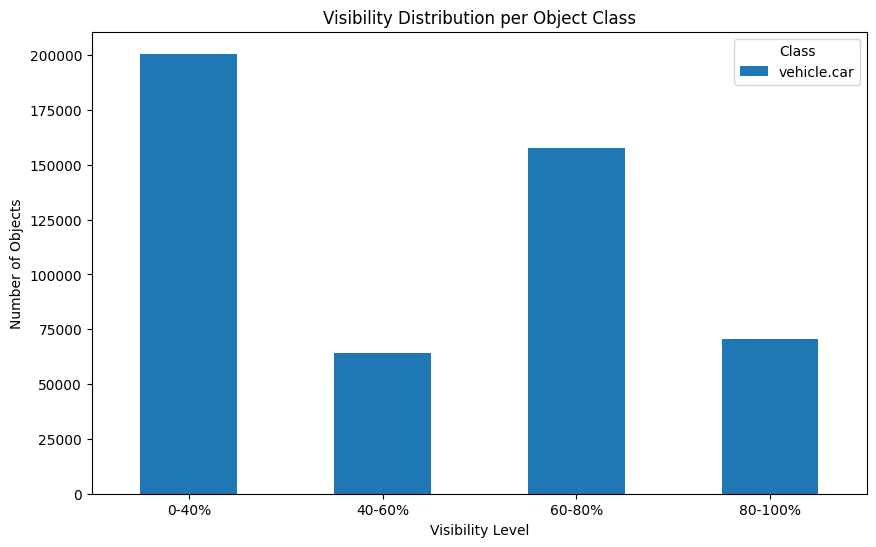

                  4      2       1      3
vehicle.car  200709  64195  157925  70493


In [16]:
# Mapping der Visibility-Strings auf numerische Levels
visibility_mapping = {
    "v0-40": 1,
    "v40-60": 2,
    "v60-80": 3,
    "v80-100": 4
}

# Dictionary für Sichtbarkeitslevel nach Klassen
class_visibility_counts = defaultdict(Counter)

# Durch alle Annotationen gehen
for ann in nusc_trainval.sample_annotation:
    # Die Kategorie des Objekts holen
    instance = nusc_trainval.get("instance", ann["instance_token"])
    category = nusc_trainval.get("category", instance["category_token"])["name"]
    
    # Sichtbarkeits-Token abrufen
    visibility_token = ann["visibility_token"]

    # Sicherstellen, dass das Token existiert
    visibility_entry = nusc_trainval.get("visibility", visibility_token)

    # Level abrufen (statt "name" wird direkt der gespeicherte Level-String verwendet)
    visibility_level = visibility_mapping.get(visibility_entry["level"], 0)

    # Nur relevante Klassen betrachten
    if category in ["vehicle.car"]:
        class_visibility_counts[category][visibility_level] += 1

# DataFrame erstellen
df_visibility = pd.DataFrame.from_dict(class_visibility_counts, orient="index").fillna(0)

# Balkendiagramm plotten
df_visibility.T.plot(kind="bar", figsize=(10, 6))
plt.xlabel("Visibility Level")
plt.ylabel("Number of Objects")
plt.title("Visibility Distribution per Object Class")
plt.xticks([0, 1, 2, 3], labels=["0-40%", "40-60%", "60-80%", "80-100%"], rotation=0)
plt.legend(title="Class")
plt.show()

# Tabelle anzeigen
print(df_visibility)